# Theory and Motivation
* There are two issues polynomial regression will address for us:
    * Non-linear feature relationships to label
    * Interaction terms between features
* Let's first explore non-linear relationships and how considering polynomial orders could help address this

* Imagine a feature that is not linear


<img src="https://www.statology.org/wp-content/uploads/2021/04/loglogPython1-768x530.png">

* We know log(x) is not linear relationship
* What is a feature X behaved like log(X)?
* Will be difficult to find a linear relationship
* What about the square of this feature? => The relationship could be more linear
* Even more so for higher orders, such as third powers
* Keep in mind this is an exaggerated example, and not every feature will have  relationships at higher order
* The main point here is to show it could be reasonable to solve for a single linear Beta coefficient for polynomial of an original feature

* Let's now also consider **interaction terms**
* What if features are only significant when **in sync** with one another
* For example:
    * Perhaps newspaper advertising spend by itself is not effective, but greatly increase effectiveness if added to a TV advertising campaign
    * Consumers only watching a TV ad will create some sales, but consumers who watch TV **and** are later "reminded through a news paper ad could contribute even more sales than TV or newspaper alone!
* How we check for this ?
    * The simplest way is to create a new feature that multiples two existing features together to create an **interaction term**
    * We can keep the original features, and add on this **interaction term**
* Fortunately Scitkit-Learn does this for us easily through a **preprocessing** call.
* Scikit-Learn's preprocessing library contains many useful tools to apply to the original data set **before** model training
* One tool is the **PolynomialFeatures** which automatically creates both higher order feature polynomials and the interaction terms between all feature combinations.
* The features created include:
    * The bias (the value of 1.0)
    * Values raised to power for each degree (e.g. $x^1, x^2 , x^3$...)
    * Interactions between all pairs of features (e.g. $x1*x2, x1*x3$)
* Converting Two Features **A** and **B** into 2 order Polynomial Features
    * <b>$1, A, B, A^2, AB, B^2$</b>
* Generalized terms of features **$X_1$** abd **$X_2$**
    * <b>$1, X_1, X_2, X_1^2, X_2^2, X1X2$</b>
* Example if row was **$X_1$** = 2 and **$X_2$** = 3
    * 1, 2, 3, 4, 6, 9
* There is no guarantee that there are actually signals within interaction term or higher order relationship

---
**Import environment**

In [53]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
mpl.rcParams.update({"figure.facecolor": "white"})

In [55]:
df = pd.read_csv(filepath_or_buffer=r"D:\Data Science\Course-2021\08-Linear-Regression-Models\Advertising.csv")

In [56]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [57]:
X = df.drop(columns="sales", axis=1)

In [58]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [59]:
y = df['sales']

In [60]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [61]:
from sklearn.preprocessing import  PolynomialFeatures

* The `degree` is what the order you want to deal
* Show only interaction terms => using the `interaction_only` = True (else it's going to include the X square)
* the `include_bias` = True => going to add in the array column of one values.

`polynomial_converter` is just feature converter

In [62]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

* Fit means is going to grab and analyze all the feature values (define the data range)
* Not transform anything until you ask it

In [63]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

* Tranform the data set

In [64]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [65]:
polynomial_converter.transform(X).shape

(200, 9)

In [66]:
polynomial_feature =polynomial_converter.transform(X)

In [67]:
X.shape

(200, 3)

The transform of X include 9 columns, while the X only include 3 columns

In [68]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

* The first three value of the polynomial_feature are the same as original X data
* The next value is the square of TV - the first value(230.1 * 230.1)
* The following 2 values is the interaction term between TV and other columns (230.1 * 37.8.2 = 8697.78, 230.1 * 69.2 = )
* The following value is the square of radio  ($37.8^2$ = 1428)
* The following value is the interaction term of radio and newspaper 15922.92, 37.8 * 69.2 = 2615
* The following value is the square of newspaper ($69.2^2$ = 4788.6 )

In [69]:
polynomial_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

* The fit and transform method are really popular in the reality
=> The combination method that satisfy both fit and transform is `fit_transform`

In [70]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

# Training and Evaluation model
* We also need to save the polynomial regression, not just model because the campaign only has 3 features why the model require 9 features

#### Perfrom the train test split

In [71]:
from sklearn.model_selection import  train_test_split

* We will use the `polymial_converter` rather than the X because we will deal with 9 features

* Using the same `test_size` and `random_state` to compare with the linear regression

In [72]:
X_train, X_test, y_train, y_test = train_test_split(polynomial_feature, y, test_size=0.3, random_state=101)

In [73]:
from  sklearn.linear_model import LinearRegression

In [74]:
model = LinearRegression()

* Select the train data

In [75]:
model.fit(X_train, y_train)

LinearRegression()

* Test prediction for the X_test

* It includes 9 beta coefficients

In [76]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [77]:
test_prediction = model.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [79]:
MAE = mean_absolute_error(y_test, test_prediction)

In [80]:
MSE = mean_squared_error(y_test, test_prediction)

In [81]:
RMSE = np.sqrt(MSE)

* Those values are more good than the Linear Regression ( Remember to test the same test size, random_state with the Linear Regresison)
    * Linear Regression
        * MAE: 1.213
        * RMSE: 1.516
    * Polynomial Regression
        * MAE: 0.4896
        * RMSE: 0.6646

In [82]:
MAE

0.48967980448035886

In [83]:
RMSE

0.6646431757269

* coef_ of the polynomial regression
* Need to base on `polynomial_features` to see what coefficient belongs to what type of data (original features, interation term feature or square feature)

In [84]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [85]:
polynomial_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [86]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

#### Bias-Variance Trade Off (Overfitting versus Underfitting)
* **Very important topic**

* We have seen that a higher order polynomial model performs significantly better than a standard linear regression model
* But how can we choose the optimal degree for the polynomial?
* What the trade-offs are we to consider as we increase model complexity
* In general, increasing model complexity in search for better performance leads to a **Bias-Variance trade-off**
* We want to have a model that can generalize well to new unseen data, but can also accout for variance and patterns in the known data
* Extreme bias or extreme variance both lead to bad models
* We can visualize this effect by considering a model that underfits (high bias) or a model that overfits (high variance)
* Let's start with a model that overfits to a dataset...


* **Overfitting**
    * Variance indicates how much the estimates of the target function will alter if different training data were used. In other words, variance describes how much a random variable differs from its expected value
    * The model fits too much to the **noise** from the data
    * This often results in **low error on training sets but high error on test/validation sets**
    * Sometime, the overfitting can be little hard to catch because you may think your model's performance well in training data set but not in test set data
    * Consider the following overfitting data
        * <img src="https://www.datarobot.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1527613915658.png">
        * What is the error on the training data here?
        * You notice that the model is hitting every single point => when calculate the MAE and MSE, RMSE => get training error of zero => mislead you in the fitting model
        * But what about on a new unseen data point?
        * Overfitting can cause large test errors!
        * <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTytHm2HONNTAxGx2fTHtltREciUCmctWYru6gYA6waapzZVjCOdBhdSObclLyp3c0AkAo&usqp=CAU">
    * Model is fitting too much to noise and variance in the training data
    * Model will perform very well on training data, but have poor performance on new unseen data.


* **Underfitting**
    * Model does not capture the underlying trend of the data and does not fit the data well enough.
    * **Low variance but high bias.**
    * underfitting is often a result of an excessively simple model
    * Model has high bias and is generalizing too much
    * Underfitting can lead to poor performance in both traning and testing data sets
    * Bias **describes how well a model matches the training set**.  Bias is the amount that a model’s prediction differs from the target value, compared to the training data.
    * <img src="https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image5.png">

* **Overfitting and Underfitting**
    * This data was easy to visualize (only has one X feature), but how can we see underfitting and overfitting when dealing with multidimensional data sets?
    * First let's imagine we trained a model and then measured its **error versus model complexity** (e.g. higher order polynomials)
    * **model complexity** is a general term that is going to apply more than just polynomial
    *  model complexity often refers to the number of features or terms included in a given predictive model, as well as whether the chosen model is linear, nonlinear, and so on. It can also refer to the algorithmic learning complexity or computational complexity
    * model complex => that mean it's a higher order polynomial
    * Good model
        * Increase the model comlexity => lower the errors
        * In the polynomial case => increase the polynomial degree => lower the error
        * <img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-030-47439-3_7/MediaObjects/492262_1_En_7_Fig2_HTML.png">
    * Bad model
        * Increase the error => increase the model complexity
    * When thinking about **overfitting and underfitting** we want to keep in mind the relationship of model performance on the training set versus the test/validation set
    * Let's imagine we split our data into **training set** and **test set**
        * Try to decide what complexity of model is most appropriate, what polynomial degree should I choose?
        * We first see performance on the training set
            * Increase the model comlexity => lower the errors. Eventually, you are increasing your moral complexity so that your model is capturing every single piece of noise and variance in your training data set
        * Now, we can't use this by itself to choose the correct moral complexity
        * Next we check performance on the test set (if overfit too much on the training test => we would eventually perform poorly on the test set)
        * Ideally the model would perform well on both, with similar behavior
        * But what happpens if we overfit on the training data? that means we would perform poorly on new test data!
        * This is good indication too much complexity, you should look for the point to determine appropriate values!
        * For certain algrithms this test error jump can be sudden isntead of gradual
        * This means when deciding optimal model complexity **and** wanting to fairly evaluate our model's performance, we can consider both the train error and test error to select an ideal complexity
        * In the case of Polynomial Regression, complexity directly relates to degree of the polynomial, but many machine learning algoithms have their own hyperparameters that can increase complexity
        * <img src="https://i.stack.imgur.com/rpqa6.jpg">

# Adjusting model parameters
* Let's explore choosing the optimal model complexity (order of polynomial)
* As we previously discussed, we will need to understand error for both training and test data to look out for potential overfitting

* Can we improve the performance by increasing the degree of the polynomial to an even higher number, like a third degree or even fourth degree polynomial
* Well we can do is just simply create a **loop** that creates all those models for the various polynomial degree, train them, calculate the error metrics for both out training data and out test data
* Then visually see where we begin to  (sudden large increase) on the test error and where we continue to decline on the training error

* The process of multiple degree of the polynomial:
    * Create the different order poly
    * Split poly feat train/test
    * fit on train
    * Store/save the RMSE for both the train AND test
    * Plot the results (error and poly order)

* Create list to store the test and train set

In [87]:
train_rmse_errors = []
test_rmse_errors = []

* The larger the range you test, the more degrees you take into account

In [88]:
for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False) # convert it
    poly_features = poly_converter.fit_transform(X) # fit and transform it
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101) # create train/test set for multiple degree
    model = LinearRegression()
    model.fit(X_train, y_train) # fit on train
    # calculate both train prediction and test prediction to avoid the overfitting or underfitting
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    # calculate the train rmse and test rmse
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)


* You should don't overcome the spike point

In [89]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292234,
 0.43393443569020695,
 0.3517083688399345,
 0.25093429203443857,
 0.19397956253436668,
 5.421548536515169,
 0.14281430849698556,
 0.1719282016506676]

* As you can see that if you overcome the spike point and the rmse of train data still low => the test data show the different point of view.

In [90]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269,
 0.5803286825216851,
 0.5077742636722449,
 2.575818175027777,
 4.318761965217181,
 1379.5295413992226,
 3910.2091466276274,
 94237.7187453714]

* After increase the degree of polynomial, the train RMSE decrease
* After increase the degree of polynomial, around 4 degree the test RMSE increase significantly

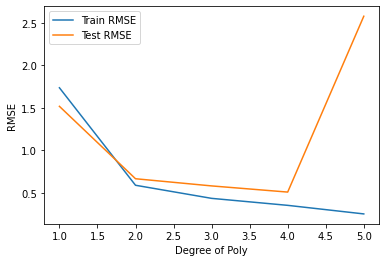

In [91]:
plt.plot(range(1,6), train_rmse_errors[:5], label="Train RMSE") # train RMSE
plt.plot(range(1,6), test_rmse_errors[:5], label="Test RMSE") # test RMSE

plt.ylabel("RMSE")
plt.xlabel("Degree of Poly")
plt.legend()

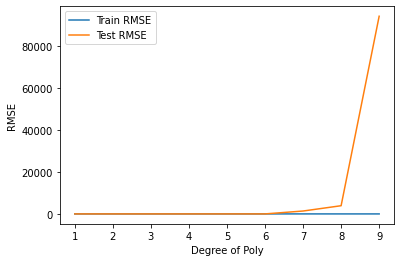

In [92]:
plt.plot(range(1,10), train_rmse_errors, label="Train RMSE") # train RMSE
plt.plot(range(1,10), test_rmse_errors, label="Test RMSE") # test RMSE

plt.ylabel("RMSE")
plt.xlabel("Degree of Poly")
plt.legend()

* We choose both good training set and test set
* We should choose the value before the break down point (the point that spiking) to avoid the

# Model Deployment


In [93]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [94]:
final_model = LinearRegression()

In [95]:
full_converter_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converter_X, y)

LinearRegression()

* Save the model and converter

In [96]:
final_model.coef_

array([ 8.96744296e-02,  3.87306507e-02,  1.40116785e-02, -4.39852533e-04,
        1.38525353e-03, -2.11551525e-04, -5.78622015e-04, -3.39038010e-04,
        2.30693236e-04,  7.62775843e-07, -1.21636828e-06,  7.24494002e-07,
        1.79932497e-06, -1.51021227e-06, -1.14841391e-07,  3.32749144e-06,
        4.93904244e-06,  2.67349509e-06, -2.30514930e-06])

In [97]:
from joblib import dump, load

In [98]:
dump(final_model, "final_poly_model.joblib")

['final_poly_model.joblib']

In [99]:
dump(final_poly_converter, "final_poly_converter.joblib")

['final_poly_converter.joblib']

In [100]:
loaded_converter = load("final_poly_converter.joblib")

In [101]:
loaded_model = load("final_poly_model.joblib")

In [102]:
campaign = [[149, 22, 12]]

In [103]:
transformed_data = loaded_converter.fit_transform(campaign)

In [104]:
loaded_model.predict(transformed_data)

array([14.64501014])